In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action = 'ignore')
import matplotlib.pyplot as plt


In [4]:
train_df = pd.read_csv('./채무불이행/train.csv').drop(columns = ['UID'])
test_df = pd.read_csv('./채무불이행/test.csv').drop(columns = ['UID'])

In [5]:
train_df.columns

Index(['주거 형태', '연간 소득', '현재 직장 근속 연수', '체납 세금 압류 횟수', '개설된 신용계좌 수',
       '신용 거래 연수', '최대 신용한도', '신용 문제 발생 횟수', '마지막 연체 이후 경과 개월 수', '개인 파산 횟수',
       '대출 목적', '대출 상환 기간', '현재 대출 잔액', '현재 미상환 신용액', '월 상환 부채액', '신용 점수',
       '채무 불이행 여부'],
      dtype='object')

In [10]:
categorical_col = [
    '주거 형태',
    '현재 직장 근속 연수',
    '대출 목적',
    '대출 상환 기간'
]

for col in categorical_col:
    print(train_df[col].unique())

['자가' '월세' '주택 담보 대출 (거주 중)' '주택 담보 대출 (비거주 중)']
['10년 이상' '4년' '6년' '2년' '8년' '3년' '5년' '9년' '7년' '1년 미만' '1년']
['부채 통합' '자동차 구매' '기타' '사업 대출' '주택 개보수' '여행 자금' '소규모 사업 자금' '교육비' '의료비'
 '고액 구매' '결혼 자금' '휴가 비용' '주택 구매' '이사 비용']
['단기 상환' '장기 상환']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 사용할 한글 폰트 지정
#font_path = "C:/Windows/Fonts/malgun.ttf"  # Windows
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"  # macOS
# font_path = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"  # Linux

font_prop = fm.FontProperties(fname=font_path)

# 폰트 적용
plt.rc('font', family=font_prop.get_name())

In [ ]:
for col in train_df.columns:
    plt.hist(train_df[col], bins=30, edgecolor='black', alpha=0.7)
    plt.title(col)
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [11]:
df = pd.DataFrame(train_df)

# col1 그룹별 col2가 1인 비율 계산
col2_ratio = df.groupby("대출 목적")["채무 불이행 여부"].mean().reset_index()

# 결과 출력
print(col2_ratio)

        대출 목적  채무 불이행 여부
0       결혼 자금   0.142857
1       고액 구매   0.117647
2         교육비   0.000000
3          기타   0.217526
4       부채 통합   0.398547
5       사업 대출   0.185039
6   소규모 사업 자금   0.000000
7       여행 자금   0.161850
8         의료비   0.196203
9       이사 비용   0.000000
10     자동차 구매   0.136842
11     주택 개보수   0.174917
12      주택 구매   0.153846
13      휴가 비용   0.333333


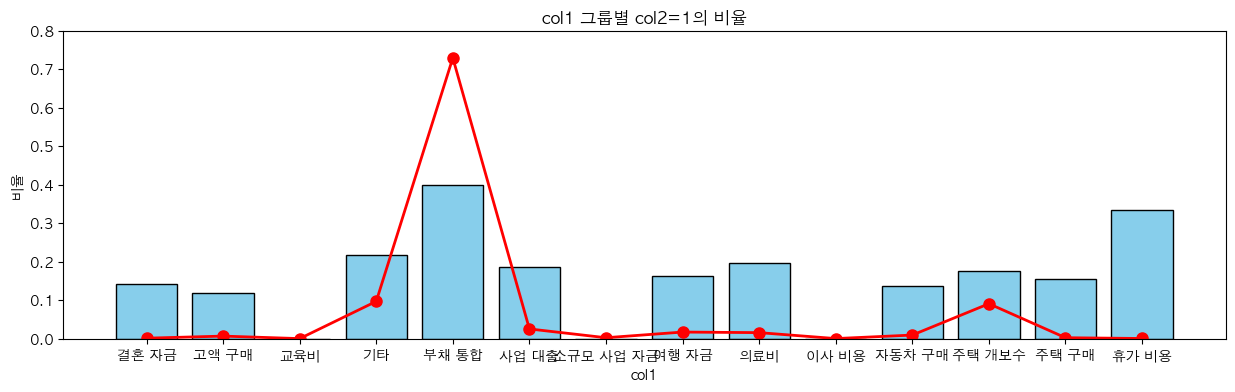

In [46]:
# 그래프 그리기
plt.figure(figsize=(15, 4))  # 그래프 크기 설정
plt.bar(col2_ratio["대출 목적"], col2_ratio["채무 불이행 여부"], color='skyblue', edgecolor='black')

plt.plot(col2_ratio["대출 목적"], (train_df['대출 목적'].value_counts()/10000)[col2_ratio["대출 목적"]].values, marker='o', color='red', linestyle='-', linewidth=2, markersize=8, label="비율 (선)")


# 그래프 제목 및 축 라벨 추가
plt.title("col1 그룹별 col2=1의 비율")
plt.xlabel("col1")
plt.ylabel("비율")
plt.ylim(0, 0.8)  # 비율이므로 y축 범위를 0~1로 설정

plt.xticks(fontsize=10)

plt.show()

In [ ]:
train_df['대출 목적'].value_counts()[col2_ratio["대출 목적"]].values

대출 목적
결혼 자금          14
고액 구매          68
교육비             3
기타            970
부채 통합        7294
사업 대출         254
소규모 사업 자금      26
여행 자금         173
의료비           158
이사 비용           4
자동차 구매         95
주택 개보수        909
주택 구매          26
휴가 비용           6
Name: count, dtype: int64